In [1]:
# #akyork
# #written to analyze the 16 HMO glycans provided by Ben
# import sys

# from glypy.io import glycoct, iupac
# import extract_motif 
# import customize_motif_vec 
# import glycan_io
# import pandas as pd
# import numpy as np
# import plot_glycan_utilities
# import seaborn as sns
# import motif_class
# from importlib import reload
# import clustering_analysis_pip
# import matplotlib.pyplot as plt
# import ndex 
# from ndex.networkn import NdexGraph
# import networkx as nx
# import warnings
# warnings.filterwarnings('ignore')
# %matplotlib inline

In [1]:
%matplotlib inline

In [12]:
import os
# from glycompare import *
import sys
import pandas as pd
from importlib import reload
sys.path.insert(0, '/Users/apple/PycharmProjects/GlyCompare/')
from glycompare import *
import glypy
reload(pipeline_functions)

<module 'glycompare.pipeline_functions' from '/Users/apple/PycharmProjects/GlyCompare/glycompare/pipeline_functions.py'>

In [3]:
glypy.monosaccharides['Glucose']

RES 1b:b-dglc-HEX-1:5

In [4]:
# root_addr = '/Users/apple/PycharmProjects/GlyCompare/Figure/Data/HMO/'
# root_addr = '/Users/apple/PycharmProjects/GlyCompare/Figure/Data/HMO/'

# load_para_keywords

In [5]:
glycompare_addr = '/Users/apple/PycharmProjects/GlyCompare/'
glytoucan_db_addr = os.path.join(glycompare_addr, 'glycompare','database', 'glytoucan_database.json')
# __init__.num_processors = 4
# __init__.exact_Ture = False
linkage_specific = True
num_processors = 8
# project parameter
working_addr = '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/'
project_name = "paper_hmo"
costumized_glycan_identifier = True
external_profile_naming= True

reload(pipeline_functions)
keywords_dict = pipeline_functions.load_para_keywords(project_name, working_addr, glyglytoucan_db_addr=glytoucan_db_addr)
keywords_dict

{'external_profile_naming_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/source_data/external_profile_naming.json',
 'glycan_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/intermediate_file/paper_hmo_glycan_dict.json',
 'glycan_motif_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/intermediate_file/paper_hmo_glycan_motif_dict.json',
 'glycoct_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/source_data/glycoct/',
 'glycoprofile_list_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/intermediate_file/paper_hmo_glycoprofile_list.json',
 'glyglytoucan_db_addr': '/Users/apple/PycharmProjects/GlyCompare/glycompare/database/glytoucan_database.json',
 'intermediate_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/intermediate_file/',
 'matched_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/intermediate_file/paper_hmo_match

In [6]:
pipeline_functions.check_init_dir(keywords_dict)

Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory


# load and extract motifs from local dir

In [7]:

data_type = 'local_glycoct'
reload(pipeline_functions)
from glycompare import glycan_io
reload(glycan_io)
glycan_dict = pipeline_functions.load_glycans_pip(keywords_dict=keywords_dict,
                                           data_type=data_type)

Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory
end loading glycoct from  /Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/source_data/glycoct/
/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/intermediate_file/paper_hmo_glycan_dict.json


In [8]:
matched_dict = pipeline_functions.extract_and_merge_substrutures_pip(keywords_dict, num_processors=num_processors,linkage_specific=linkage_specific, forced=True)

start glycan_dict
start parallel parsing 16 glycans
start 3'SL
start LNnT
start LSTc
start LNFP III
start LSTb
start DSLNH
start 3FL
start DFLNH
3FL 3 0.014033794403076172
3'SL 3 0.021108150482177734
LNnT 4 0.027041912078857422
start FLNH
start DSLNT
LSTc 5 0.042633056640625
start LNFP I
LNFP III 5 0.04812979698181152
start LNT
start 2'FL
LSTb 5 0.06167101860046387
start LNFP II
2'FL 3 0.007439136505126953
start DFLNT
LNT 4 0.01923203468322754
LNFP I 5 0.048284053802490234
start FDSLNH
LNFP II 5 0.04113006591796875
DSLNT 6 0.10849499702453613
DFLNT 6 0.07400202751159668
FLNH 7 0.16802597045898438
DSLNH 8 0.2897498607635498
DFLNH 8 0.31069302558898926
FDSLNH 9 0.6618092060089111
finished pool
glycan_dict 16
finished parse motif_dic
start merge motif_dict
Start merge_glycan_motif_to_motif_dict
combine original
motif_dict is merged with len  410
finished removing duplicate
after the cleaning the motif vec's length is 144
finished merge motif_dic
1 5
2 12
3 19
4 25
5 31
6 28
7 17
8 6
9 1
1

In [9]:
chra_to_id = {}
# for j in range(16):
#     _a = j+1
#     chra_to_id[_a]={}
for i in glycan_dict.keys():
    chra_to_id[i]=i
json_utility.store_json('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/source_data/glycan_identifier_to_structure_id.json', chra_to_id)

# preparing the glycan_table and motif_table

In [10]:
glycan_abd_table = pd.read_csv('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_hmo/source_data/abundance_table.csv', index_col=0)
glycan_abd_table = glycan_abd_table.transpose()
glycan_abd_table = glycan_abd_table.drop(columns=41)
reload(pipeline_functions)
from glycompare import process_glycoprofiles
reload(process_glycoprofiles)
_, glycoprofile_list = pipeline_functions.glycoprofile_pip(keywords_dict, glycan_abd_table, unique_glycan_identifier_to_structure_id=True, already_glytoucan_id=False, external_profile_naming=True, forced=True)

abd_list 16 profile_list 47
16 47
duplicating naming


<class 'str'>
start building dependence_tree
1
2
3
4
5
6
7
8
9
Start dropping nodes with weight zero, nodes count: 144
Nodes left []
144 270
_a.nodes 144
_a.nodes 144
merged_weights_dict 144
After first drop 91 + 53 =  144 144.0
After comparing same level, dropping_list 118
After second dropping 118 + 26 =  144 144.0
mod_nodes 26
mod_edges 16


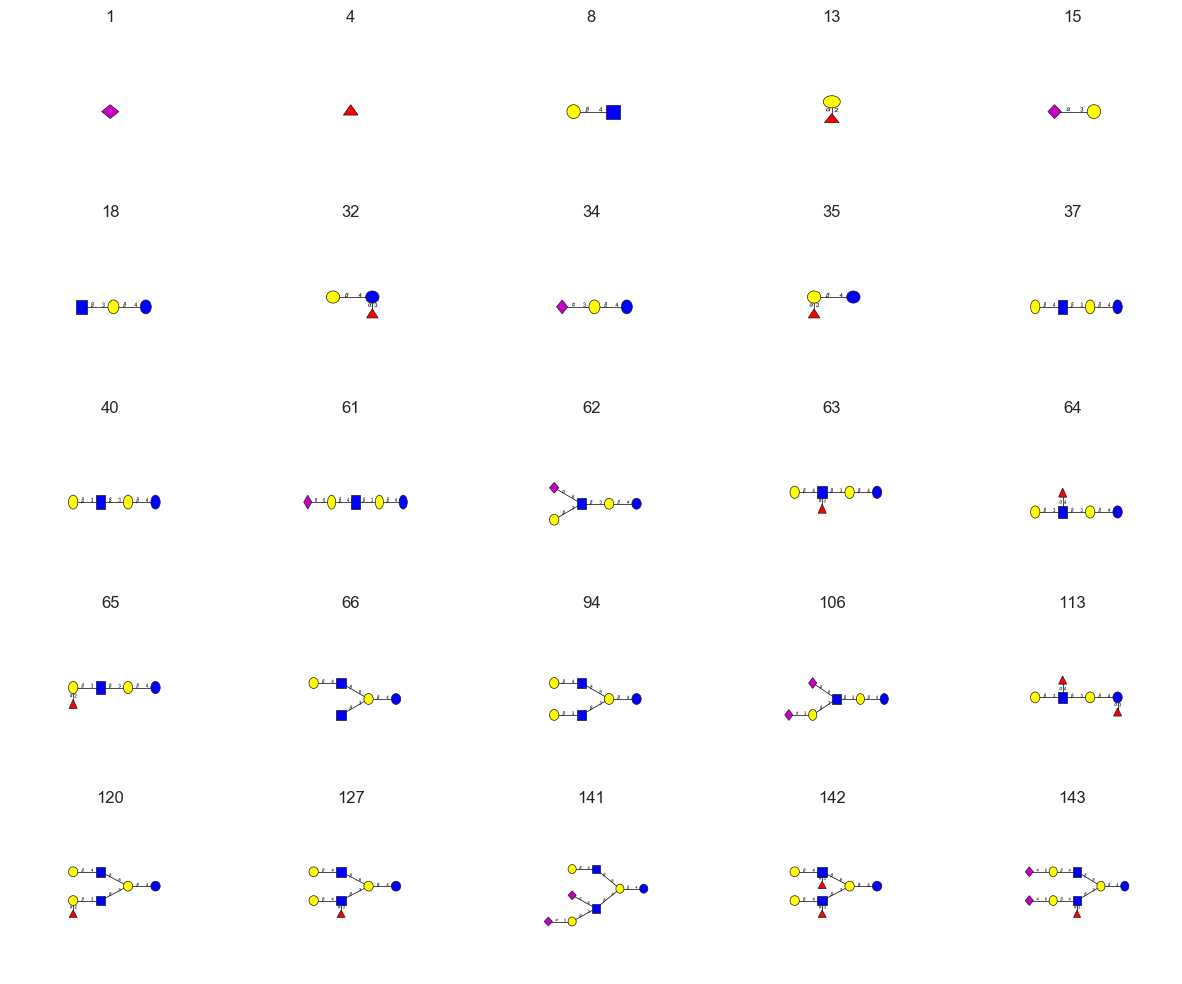

In [14]:
reload(pipeline_functions)
from glycompare import select_motifs
from glypy.io import glycoct
reload(select_motifs)
core=glycoct.loads(
"""
RES
1b:b-dglc-HEX-1:5
LIN""")
motif_abd_table, motif_lab, merged_weights_dict=pipeline_functions.select_motifs_pip(keywords_dict, 
                                                     linkage_specific=linkage_specific,     
                                                     only_substructures_start_from_root=False,
                                                     core=core,
                                                     drop_parellel=True,
                                                     drop_diff_abund=False,
                                                     select_col= [])
# we also remove the (glactose - glucose) because they are all same abundance
motif_abd_table = motif_abd_table.drop(index=5)
motif_abd_table_addr = keywords_dict['motif_abd_table_addr']
motif_abd_table.to_csv(motif_abd_table_addr)
reload(plot_glycan_utilities)
plot_glycan_utilities.plot_glycan_list([motif_lab.motif_vec[i] for i in motif_abd_table.index], motif_abd_table.index.tolist(), label=True)

# Plotting glycan clustering table, similar as S7 b

<Figure size 600x400 with 0 Axes>

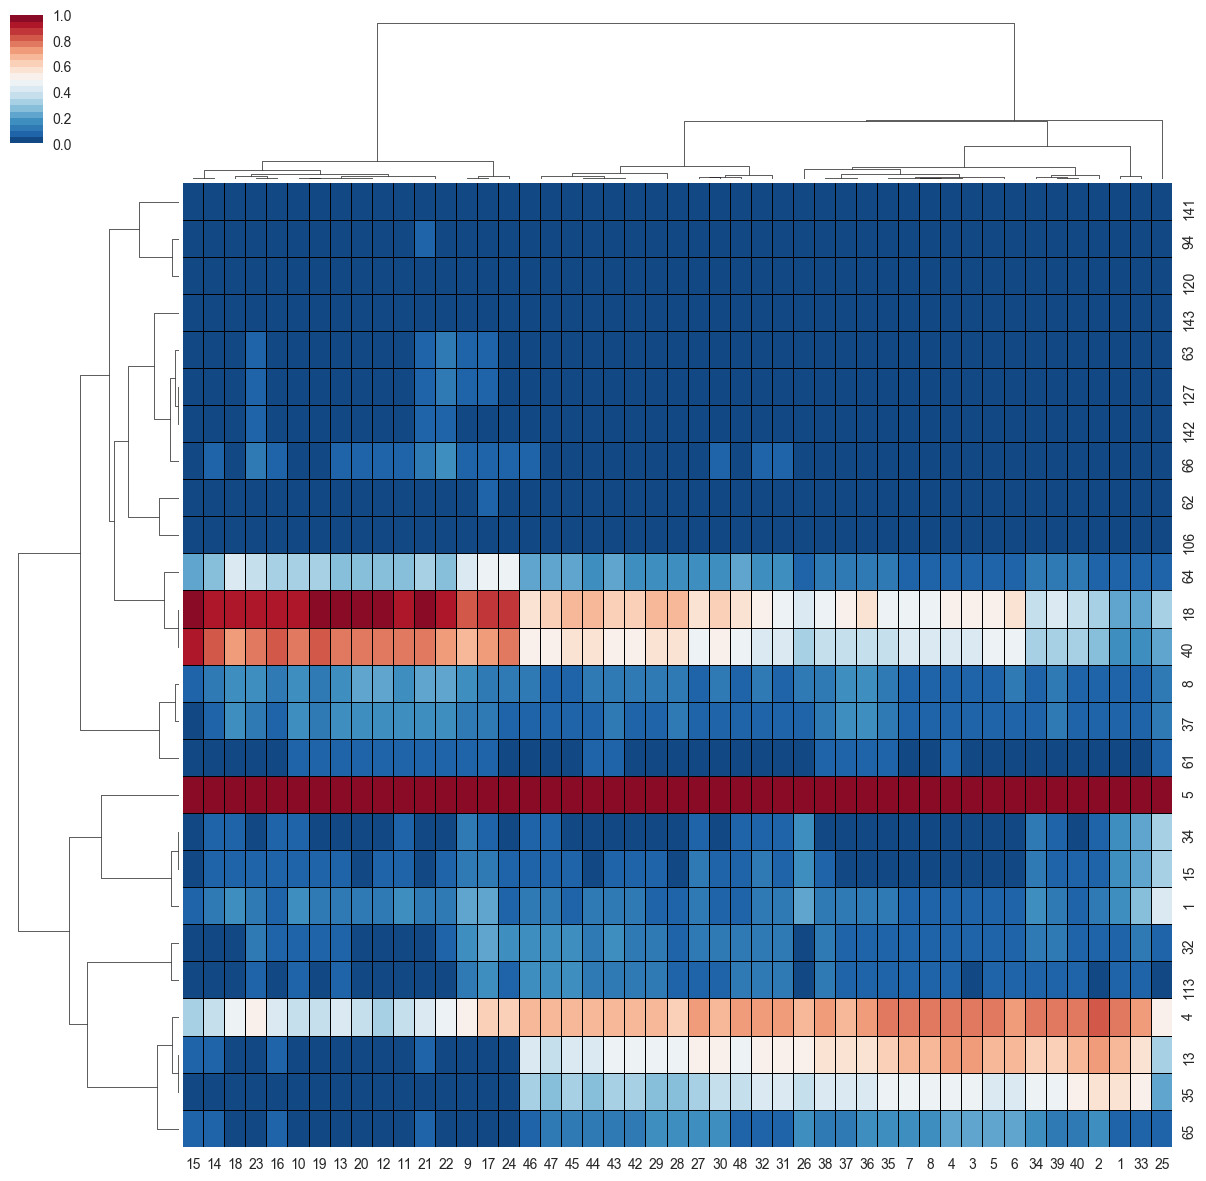

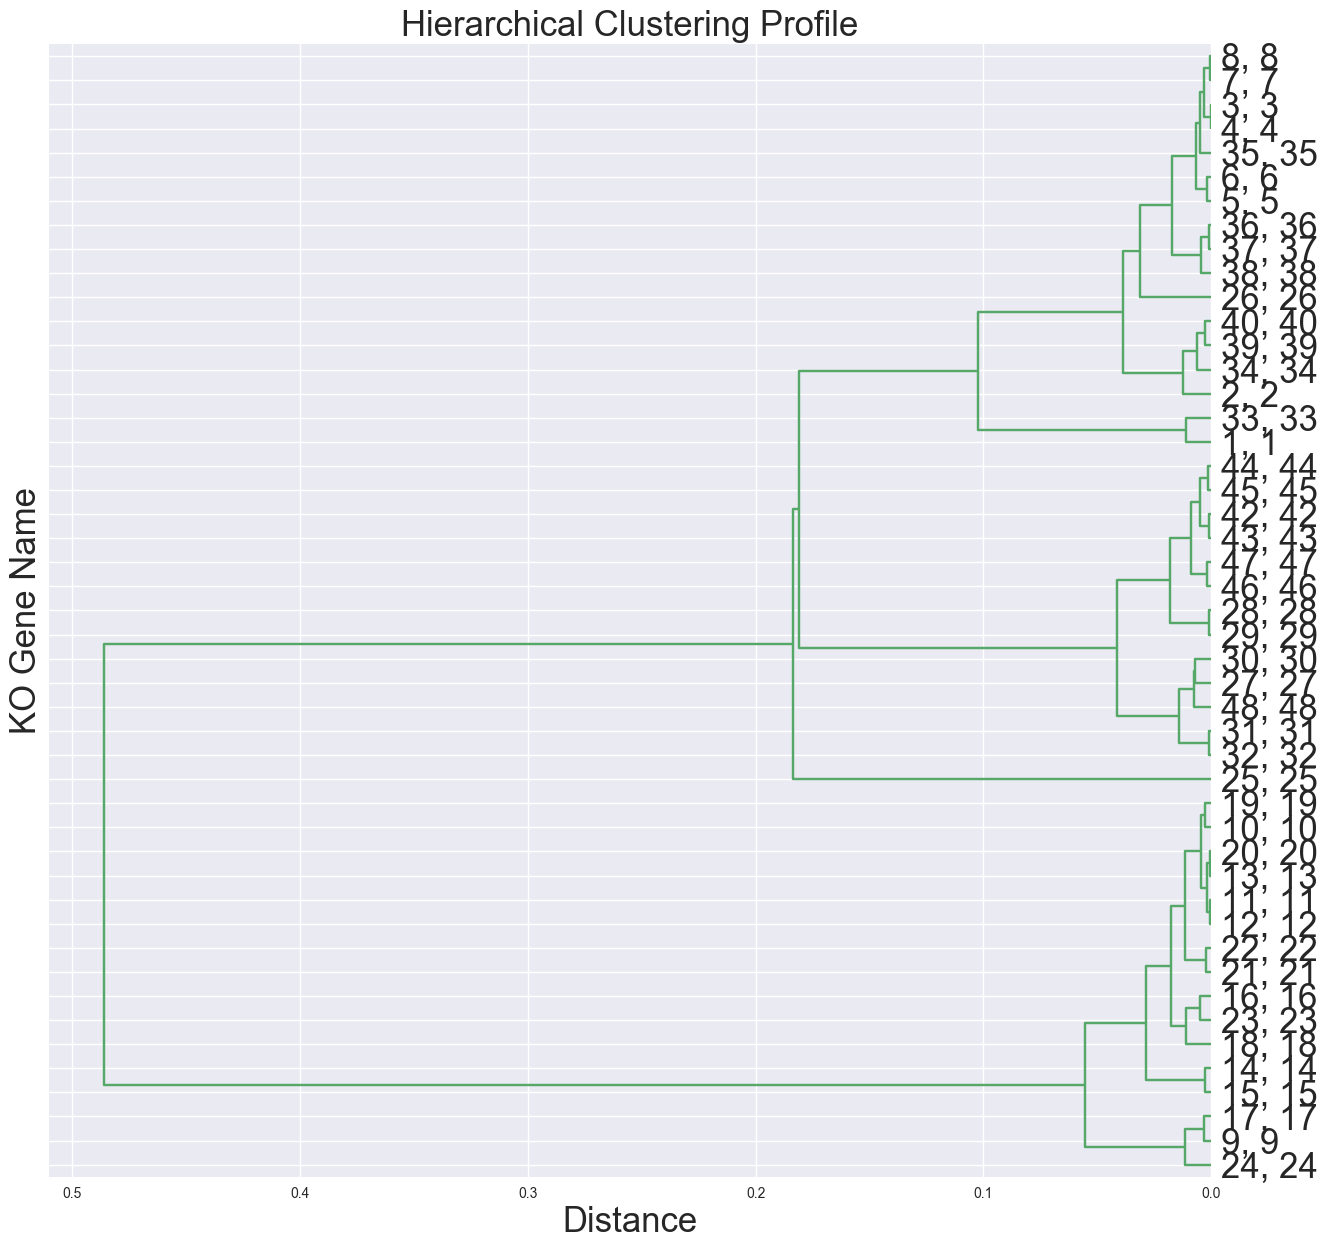

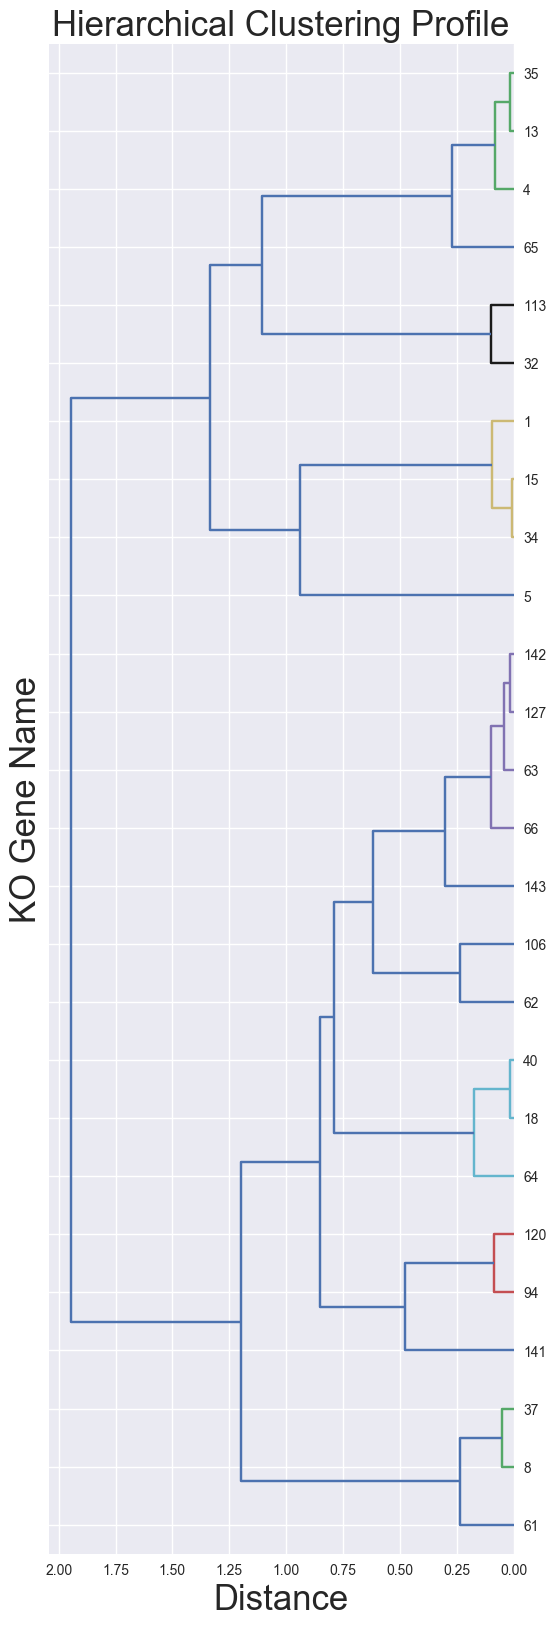

In [174]:
# selected_name_list = json_utility.load_json(keywords_dict['external_profile_naming_addr'])
reload(pipeline_functions)
glycoprofile_cluster_dict, glyco_motif_cluster_dict = pipeline_functions.clustering_analysis_pip(keywords_dict=keywords_dict, 
                                           motif_abd_table=motif_abd_table, 
                                           select_profile_name = [])
# motif_abd_table.columns

# Plotting glycan clustering table, similar as S7 a

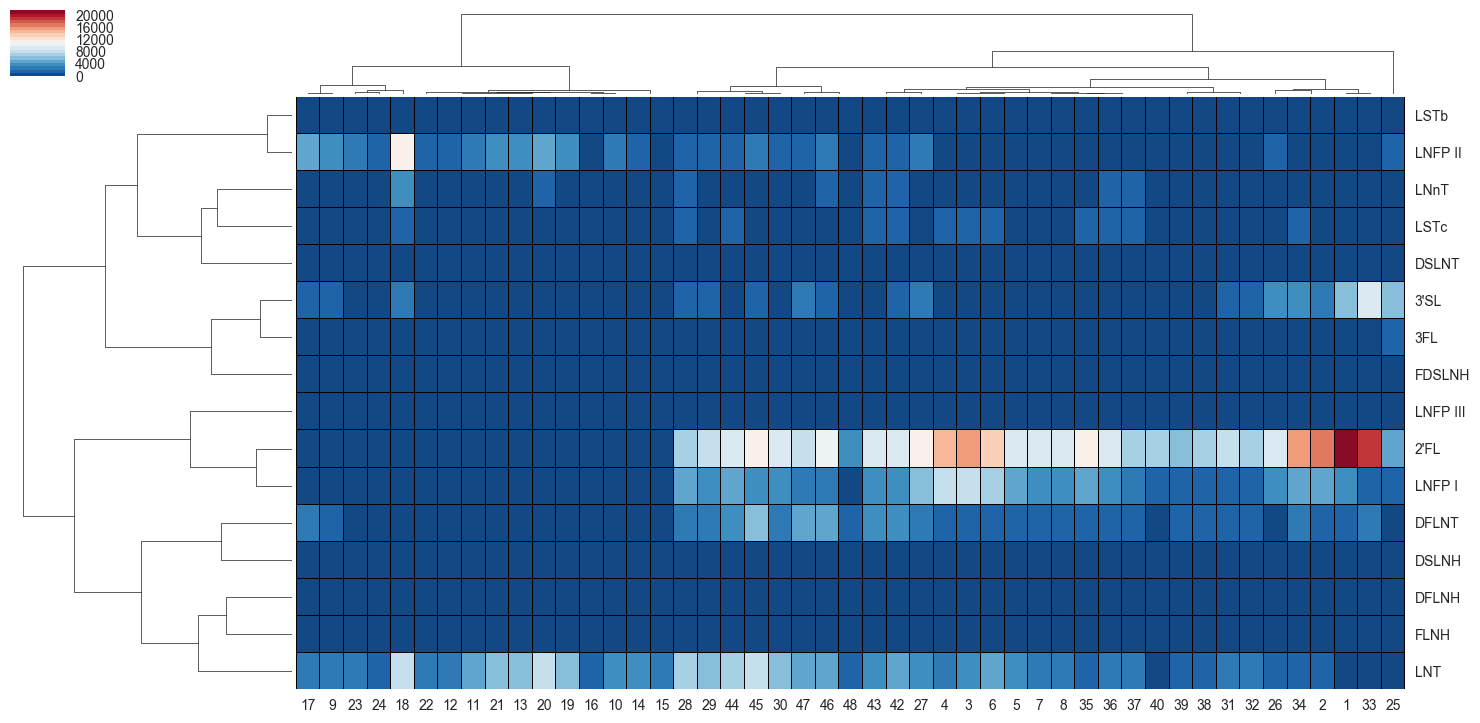

In [194]:

import seaborn as sns
g = sns.clustermap(glycan_abd_table, metric="correlation", cmap=sns.color_palette("RdBu_r", 20), linewidths=.01,figsize=(18,9),linecolor='black',method='complete', )
